<a href="https://colab.research.google.com/github/Soulpurr/bank_churn_prediction_ml/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import statements
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [ ]:
df=pd.read_csv("./drive/MyDrive/bank_churn/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA-Exploring The Data




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df1=df.drop(["CustomerId","Surname"],axis='columns')

In [ ]:
df1.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df[df.duplicated()]
#No duplicate rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
def print_unique_col_values(df):
  for columns in df:
    print(f"{columns}:{df[columns].unique()}")

In [ ]:
df1.isnull().sum()

RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
print_unique_col_values(df1)

RowNumber:[    1     2     3 ...  9998  9999 10000]
CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640

In [ ]:
#Converting gender to 0 & 1
df1['Gender'].replace({"Female":1,"Male":0},inplace=True)


In [ ]:
df2=pd.get_dummies(data=df1,columns=['Geography'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Gender             10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 888.8 KB


(array([[7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2037.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

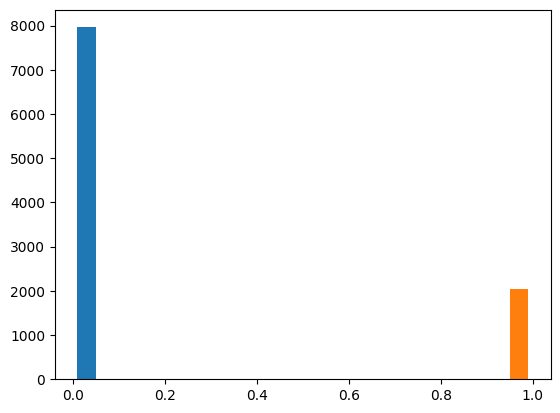

In [ ]:
plt.hist([df2[df2['Exited'] == 0]['Exited'], df2[df2['Exited'] == 1]['Exited']], label=['Exited=0', 'Exited=1'])


In [ ]:
#Scaling The data b/w 0 and 1
cols_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [ ]:

df2.drop('RowNumber',axis='columns',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  float64
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(6), int64(4), uint8(3)
memory usage: 810.7 KB


# Modelling

In [ ]:
#Dividing data into features and labels
x=df2.drop('Exited',axis='columns')
y=df2['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4983 to 1146
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Gender             8000 non-null   int64  
 2   Age                8000 non-null   float64
 3   Tenure             8000 non-null   float64
 4   Balance            8000 non-null   float64
 5   NumOfProducts      8000 non-null   float64
 6   HasCrCard          8000 non-null   int64  
 7   IsActiveMember     8000 non-null   int64  
 8   EstimatedSalary    8000 non-null   float64
 9   Geography_France   8000 non-null   uint8  
 10  Geography_Germany  8000 non-null   uint8  
 11  Geography_Spain    8000 non-null   uint8  
dtypes: float64(6), int64(3), uint8(3)
memory usage: 648.4 KB


In [ ]:
def ANN(x_train,x_test,y_train,y_test):
  model=keras.Sequential(
      [
          keras.layers.Dense(10,input_shape=(12,),activation='relu'),
          keras.layers.Dense(5,activation='relu'),
          keras.layers.Dense(1,activation='sigmoid')
      ]
  )

  model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )
  model.fit(x_train,y_train,epochs=55)
  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)
  print(f"classification Report:{classification_report(y_preds,y_test)}");



In [ ]:
ANN(x_train,x_test,y_train,y_test)

Epoch 1/55
250/250 [==============================] - 2s 4ms/step - loss: 0.5659 - accuracy: 0.7261
Epoch 2/55
250/250 [==============================] - 1s 4ms/step - loss: 0.4862 - accuracy: 0.7945
Epoch 3/55
250/250 [==============================] - 1s 4ms/step - loss: 0.4686 - accuracy: 0.7986
Epoch 4/55
250/250 [==============================] - 1s 4ms/step - loss: 0.4572 - accuracy: 0.8006
Epoch 5/55
250/250 [==============================] - 1s 4ms/step - loss: 0.4459 - accuracy: 0.8064
Epoch 6/55
250/250 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.8105
Epoch 7/55
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8120
Epoch 8/55
250/250 [==============================] - 1s 3ms/step - loss: 0.4289 - accuracy: 0.8149
Epoch 9/55
250/250 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.8175
Epoch 10/55
250/250 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.8161

In [ ]:
 df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Handling the data imbalance

In [ ]:
#using under sampling method
num_0,num_1= df2['Exited'].value_counts()
num_0,num_1

(7963, 2037)

In [ ]:
df_0=df2[df['Exited']==0]
df_1=df2[df['Exited']==1]



df_0=df_0.sample(num_1)
df_under_sampling = pd.concat([df_0, df_1], axis=0)


In [ ]:
df_under_sampling['Exited'].value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [ ]:
X = df_under_sampling.drop('Exited',axis='columns')
y = df_under_sampling['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
ANN(X_train, X_test, y_train, y_test)

Epoch 1/55
102/102 [==============================] - 2s 3ms/step - loss: 0.6898 - accuracy: 0.5400
Epoch 2/55
102/102 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.5993
Epoch 3/55
102/102 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6355
Epoch 4/55
102/102 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6484
Epoch 5/55
102/102 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6701
Epoch 6/55
102/102 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.6849
Epoch 7/55
102/102 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.6886
Epoch 8/55
102/102 [==============================] - 0s 4ms/step - loss: 0.6117 - accuracy: 0.6907
Epoch 9/55
102/102 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.6981
Epoch 10/55
102/102 [==============================] - 0s 5ms/step - loss: 0.5930 - accuracy: 0.7076

In [ ]:
#OverSampling by SMOTE
X = df2.drop('Exited', axis=1)
y = df2['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

smote = SMOTE(sampling_strategy='minority',random_state=2)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.shape


(12740,)

In [ ]:
ANN(X_sm, X_test,y_sm,y_test)

Epoch 1/55
399/399 [==============================] - 5s 6ms/step - loss: 0.6590 - accuracy: 0.5994
Epoch 2/55
399/399 [==============================] - 2s 4ms/step - loss: 0.6077 - accuracy: 0.6703
Epoch 3/55
399/399 [==============================] - 1s 3ms/step - loss: 0.5840 - accuracy: 0.6904
Epoch 4/55
399/399 [==============================] - 1s 3ms/step - loss: 0.5713 - accuracy: 0.7091
Epoch 5/55
399/399 [==============================] - 1s 3ms/step - loss: 0.5653 - accuracy: 0.7192
Epoch 6/55
399/399 [==============================] - 1s 3ms/step - loss: 0.5602 - accuracy: 0.7250
Epoch 7/55
399/399 [==============================] - 1s 3ms/step - loss: 0.5559 - accuracy: 0.7247
Epoch 8/55
399/399 [==============================] - 2s 4ms/step - loss: 0.5522 - accuracy: 0.7291
Epoch 9/55
399/399 [==============================] - 2s 5ms/step - loss: 0.5480 - accuracy: 0.7284
Epoch 10/55
399/399 [==============================] - 2s 5ms/step - loss: 0.5435 - accuracy: 0.7308